<a href="https://colab.research.google.com/github/Banafshehkh/Interview_Preparation/blob/main/Weather_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import zipfile

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
zip_file_path = "/content/drive/MyDrive/interview/archive.zip"
destination_path = "/content/drive/MyDrive/interview"

In [6]:
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
  zip_ref.extractall(destination_path)

In [10]:
train_data = pd.read_csv("/content/drive/MyDrive/interview/DailyDelhiClimateTrain.csv")
train_data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [9]:
test_data = pd.read_csv("/content/drive/MyDrive/interview/DailyDelhiClimateTest.csv")
test_data

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [12]:
train_data.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [19]:
train_data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [21]:
fig = px.line(train_data,
              x = "date",
              y = "meantemp",
              title = "Mean temp over the years")
fig.show()

In [22]:
fig = px.line(train_data,
              x = "date",
              y = "humidity",
              title = "humidity over the years")
fig.show()

In [24]:
figure = px.line(train_data, x="date", 
                 y="wind_speed", 
                 title='Wind Speed in Delhi Over the Years')
figure.show()

In [26]:
figure = px.scatter(data_frame = train_data, x="humidity",
                    y="meantemp", size="meantemp", 
                    trendline="ols", 
                    title = "Relationship Between Temperature and Humidity")
figure.show()

In [28]:
from scipy.sparse import data
train_data["date"] = pd.to_datetime(train_data["date"], format = "%Y-%m-%d")
train_data["year"] = train_data["date"].dt.year
train_data["month"] = train_data["date"].dt.month
train_data.head(5)

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


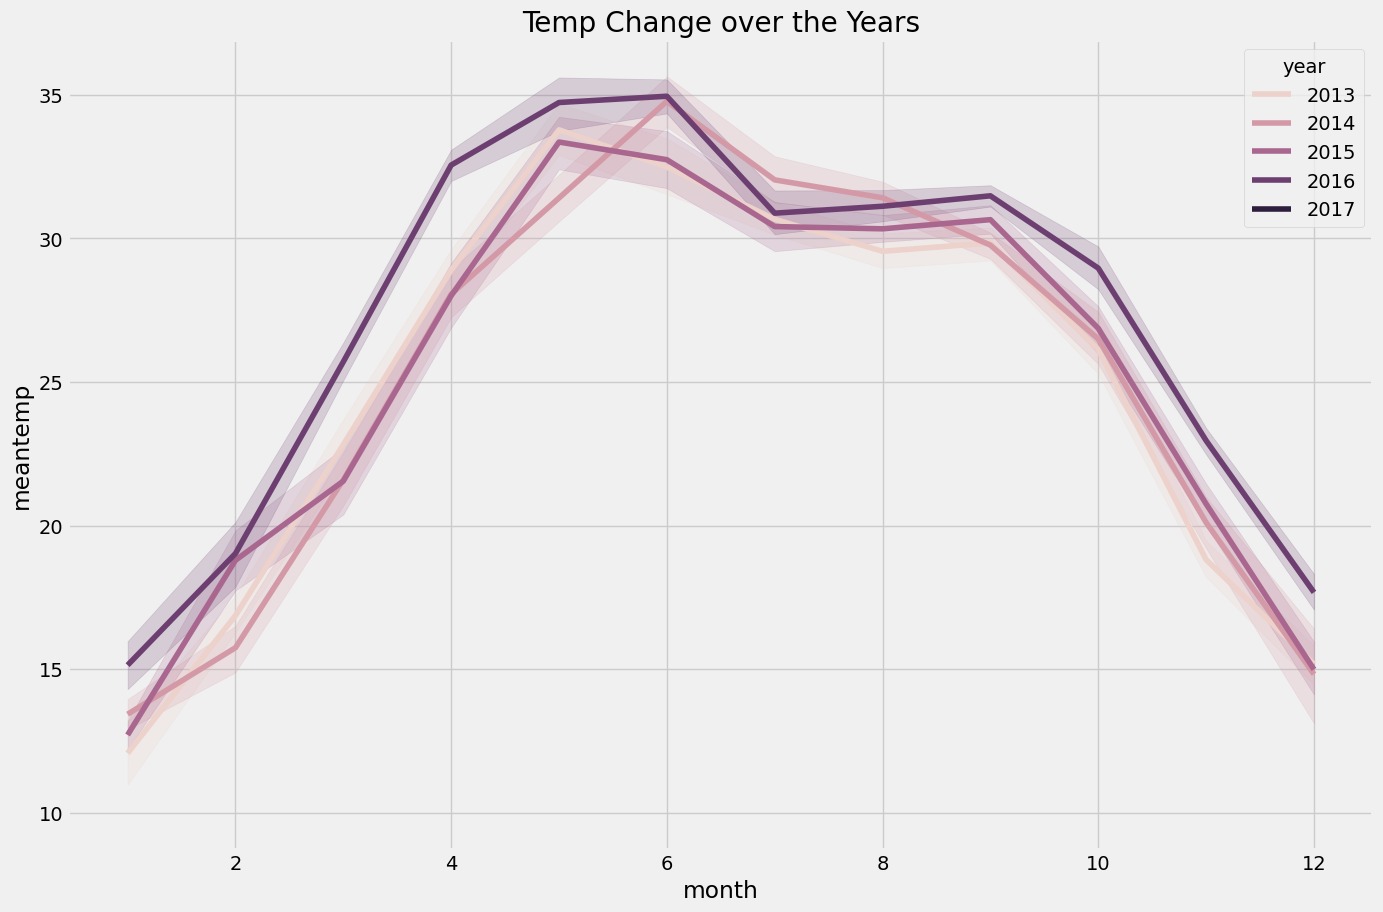

In [31]:
plt.style.use('fivethirtyeight')

plt.figure(figsize = (15, 10))
plt.title("Temp Change over the Years")
sns.lineplot(data = train_data, x = "month", y = "meantemp", hue = "year")
plt.show()

In [37]:
forcast_data = train_data.rename(columns = {"date" : "ds",
                                       "meantemp": "y"})

forcast_data

,ds,y,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1
...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016,12


# Facebook prophet model for weather forecasting 





In [39]:
model = Prophet()
model.fit(forcast_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpezs20ul0/dt_syvaj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpezs20ul0/fm9rw6_k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38729', 'data', 'file=/tmp/tmpezs20ul0/dt_syvaj.json', 'init=/tmp/tmpezs20ul0/fm9rw6_k.json', 'output', 'file=/tmp/tmpezs20ul0/prophet_model5hz5j2n3/prophet_model-20230612154949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:49:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:49:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [40]:
forcasts = model.make_future_dataframe(periods = 365)
predictions = model.predict(forcasts)
plot_plotly(model, predictions)